<a href="https://colab.research.google.com/github/Ashong-Nartey/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing needed Libraries and Defining user functions. 

# 1.1 Import Libraries

In [ ]:
!pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=96d0cd0ff0b5dca568726c8fd9d3ccc723453dcaddfa11d05e1e5420a1bfe3b0
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pyforest

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score

In [ ]:
!pip3 install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from xgboost import XGBRegressor, XGBClassifier, plot_importance
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import cufflinks as cf
import plotly.offline
import colorama
from colorama import Fore, Style  # for coloured strings
import warnings
from termcolor import colored

warnings.filterwarnings('ignore')
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)

# pd.set_option('display.max_rows', 100) # if you wish to see more rows rather than default, just uncomment this line.
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# 1.2 User functions definitions

### Let's write a function that would be used to determine the proportion of missing values in out datasets

In [ ]:
# Function for determining the number and percentages of missing values

def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

### A function to obtain the summary information on the heart dataset 

In [ ]:
# Function for insighting summary information about the column

def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

### Let's define functions to examine the scores that would be obtained by the machine learning models 

In [ ]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)


# 2. Data and Pre-processing

## 2.1 Heart Disease data synopsis

Heart or Cardiovascular diseases (CVDs) are the number 1 cause of sudden death globally, taking an estimated 31% of all deaths worldwide, each year. Four out of 5 CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with underlying health issues such as hypertension, diabetes, and hyperlipidaemia have either been medically diagnosed to be with or are at high risk of getting diagnosed with a cardiovascular disease. Such individdual need early detection and management of the disease wherein a machine learning model can be of great help.

## 2.2 Data Features and Corresponding Attributes



1.  **Age:** age of the patient [years]

2. **Sex:** sex of the patient [M: Male, F: Female]

3. **ChestPainType:** chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

4. **RestingBP:** resting blood pressure [mm Hg]

5. **Cholesterol:** serum cholesterol [mm/dl]

6. **FastingBS:** fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

7. **RestingECG:** resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

8. **MaxHR:** maximum heart rate achieved [Numeric value between 60 and 202]

9. **ExerciseAngina:** exercise-induced angina [Y: Yes, N: No]

10. **Oldpeak:** oldpeak = ST [Numeric value measured in depression]

11. **ST_Slope:** the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

12. **HeartDisease:** output class [1: heart disease, 0: Normal]

## 2.3 Problem Statement

The heart disease prediciton is binary classification problem where will make a prection on the target variable HeartDisease
This shall include the building of a variety of Classification models and compare the models giving the best prediction on Heart Disease.

## 2.4 Prediction target

In this study the target variable is HeartDisease in the context of determining whether anybody is likely to get hearth disease based on the input parameters like gender, age and various test results or not. The target can be continues when performing regression or binary. But in this case the target variable is binary, that is either 0 or 1.

# 3. Data and Analysis

 ## 3.1 Uploading data from the local drive and Importing it to a dataframe.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
### type in the following code to import it into a dataframe (make sure the filename matches the name of the uploaded file)

import io
df = pd.read_csv(io.BytesIO(uploaded['heart.csv'])) # this imports the data into a dataframe

## uncommenting the below code does save will save any uploaded file in the current directory using the uploaded file name
 
#for name, data in uploaded.items():
#  with open(name, 'wb') as f:
 #   f.write(data)
  #  print ('saved file', name)

In [ ]:
df # this is to display a synopsis of the data uploaded and imported into dataframe 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.000,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.000,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.000,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.500,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.000,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.200,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.400,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.200,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.000,Flat,1


Everything is fine and working so far. The data has been uploaded and imported successfully into a panda dataframe as it can been seen from the previous cell, a section of the data has been displayed in a table format with some detailed table information of the number of rows and the number of columns. Subsequent cells shall let us further explore to understand the content of the data that we have so far. We shall conduct an exploratory analysis with some visualizations in bid to have a fair idea of the data. 

## 3.2 General look at the data

In [ ]:
### Let's begin by looking at the various columns
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.000,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.000,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.000,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.500,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.000,Up,0


The above code displays the column header names which is also referred to as FEATURES together with few elements. In this data, there are 12 features in all with 11 independent features and 1 dependent feature (Heart Disease). Let's go ahead to view the last 4 set entries of the data. 

In [ ]:
## Display the last 4 set entries from the data.
df.tail() 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.200,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.400,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.200,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.000,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.000,Up,0


So from the above cell, we could observe that we have 918 observations or entries. Kindly note that in python, the counter starts from zero(0). 

In [ ]:
print("There are ", df.shape[0], "records and", df.shape[1], "features in the dataset")

There are  918 records and 12 features in the dataset


In [ ]:
## let's randomly view some more entries. In this case 10.  
df.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
54,52,F,ASY,130,180,0,Normal,140,Y,1.500,Flat,0
468,62,M,ASY,152,153,0,ST,97,Y,1.600,Up,1
744,60,M,ASY,117,230,1,Normal,160,Y,1.400,Up,1
766,50,F,NAP,120,219,0,Normal,158,N,1.600,Flat,0
621,56,M,NAP,130,256,1,LVH,142,Y,0.600,Flat,1
563,55,M,ASY,135,204,1,ST,126,Y,1.100,Flat,1
548,66,M,ASY,112,261,0,Normal,140,N,1.500,Up,1
679,63,M,TA,145,233,1,LVH,150,N,2.300,Down,0
5,39,M,NAP,120,339,0,Normal,170,N,0.000,Up,0
690,45,M,ASY,142,309,0,LVH,147,Y,0.000,Flat,1


All Along we have not had the chance to exactly view the names of our features. They have always been displayed with values, so let's go ahead and only display the names of the features we are working with

In [ ]:
## displaying feature names
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
## getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Describing the dataset statistically

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.000,53.511,9.433,28.000,47.000,54.000,60.000,77.000
RestingBP,918.000,132.397,18.514,0.000,120.000,130.000,140.000,200.000
Cholesterol,918.000,198.800,109.384,0.000,173.250,223.000,267.000,603.000
FastingBS,918.000,0.233,0.423,0.000,0.000,0.000,0.000,1.000
MaxHR,918.000,136.809,25.460,60.000,120.000,138.000,156.000,202.000
Oldpeak,918.000,0.887,1.067,-2.600,0.000,0.600,1.500,6.200
HeartDisease,918.000,0.553,0.497,0.000,0.000,1.000,1.000,1.000


In [ ]:
df.describe(include=object).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [ ]:
#Displaying the unique values each feature has
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [ ]:
for col in df.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {df[col].nunique()} unique values")

Age has 50 unique values
RestingBP has 67 unique values
Cholesterol has 222 unique values
FastingBS has 2 unique values
MaxHR has 119 unique values
Oldpeak has 53 unique values
HeartDisease has 2 unique values


Let's check, if there's any duplicity, if TRUE is returned, then it means some of the records are duplicated, a FALSE means no record has been duplicated.

In [ ]:
df.duplicated().value_counts()

False    918
dtype: int64

In [ ]:
## Checking for missing values
missing (df)

,Missing_Number,Missing_Percent
Age,0,0.000
Sex,0,0.000
ChestPainType,0,0.000
RestingBP,0,0.000
Cholesterol,0,0.000
FastingBS,0,0.000
RestingECG,0,0.000
MaxHR,0,0.000
ExerciseAngina,0,0.000
Oldpeak,0,0.000


There aren't any missing values in all features.

## 3.3  Target Variable $(Y)$ examination 

In [ ]:
first_looking("HeartDisease")

column name    :  HeartDisease
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
1    508
0    410
Name: HeartDisease, dtype: int64


1    508
0    410
Name: HeartDisease, dtype: int64


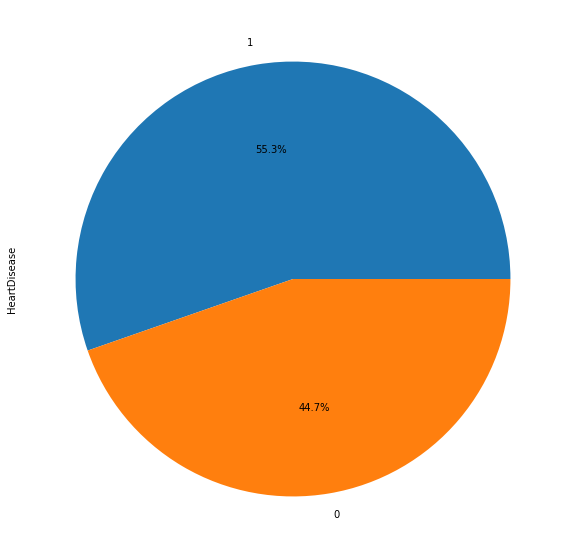

In [ ]:
print(df["HeartDisease"].value_counts())
df["HeartDisease"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10, 10));

From the pie chart, and the statistics, the number of patience with a heart disease (1) is more than the number of patience without any heart disease (0). By executing the code below, the details of the total number of heart disease patience and no heart disease patience shall be displayed

In [ ]:
y = df['HeartDisease']
print(f'Percentage of Heart Disease: % {round(y.value_counts(normalize=True)[1]*100,2)} --> ({y.value_counts()[1]} cases for Heart Disease)\nPercentage of Not Heart Disease: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} cases for NOT Heart Disease)')

Percentage of Heart Disease: % 55.34 --> (508 cases for Heart Disease)
Percentage of Not Heart Disease: % 44.66 --> (410 cases for NOT Heart Disease)


In [ ]:
df['HeartDisease'].describe()

count   918.000
mean      0.553
std       0.497
min       0.000
25%       0.000
50%       1.000
75%       1.000
max       1.000
Name: HeartDisease, dtype: float64

In [ ]:
## Highlight the statistical values in the dataset by applying some cell colorization techniques
df[df['HeartDisease']==0].describe().T.style.background_gradient(subset=['mean', 'std', '50%', 'count'], cmap = 'RdPu')

,count,mean,std,min,25%,50%,75%,max
Age,410.000000,50.551220,9.444915,28.000000,43.000000,51.000000,57.000000,76.000000
RestingBP,410.000000,130.180488,16.499585,80.000000,120.000000,130.000000,140.000000,190.000000
Cholesterol,410.000000,227.121951,74.634659,0.000000,197.250000,227.000000,266.750000,564.000000
FastingBS,410.000000,0.107317,0.309894,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,410.000000,148.151220,23.288067,69.000000,134.000000,150.000000,165.000000,202.000000
Oldpeak,410.000000,0.408049,0.699709,-1.100000,0.000000,0.000000,0.600000,4.200000
HeartDisease,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


The above above table gives the statistical description of patience with no heart disease. let's now look at the statistical description of those with heart diseases by running the code below. 

In [ ]:
df[df['HeartDisease']==1].describe().T.style.background_gradient(subset=['mean', 'std', '50%', 'count'], cmap = 'YlGnBu')

,count,mean,std,min,25%,50%,75%,max
Age,508.000000,55.899606,8.727056,31.000000,51.000000,57.000000,62.000000,77.000000
RestingBP,508.000000,134.185039,19.828685,0.000000,120.000000,132.000000,145.000000,200.000000
Cholesterol,508.000000,175.940945,126.391398,0.000000,0.000000,217.000000,267.000000,603.000000
FastingBS,508.000000,0.334646,0.472332,0.000000,0.000000,0.000000,1.000000,1.000000
MaxHR,508.000000,127.655512,23.386923,60.000000,112.000000,126.000000,144.250000,195.000000
Oldpeak,508.000000,1.274213,1.151872,-2.600000,0.000000,1.200000,2.000000,6.200000
HeartDisease,508.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3.4 More Statistical Analysis

### 3.4.1 Skewness 

Skewness is the measure of lack of symmetry in the dataset. Letting $X$ be the features in the dataset, the mean is $\mu = \mathbb{E}(X)$ and the variance is $\sigma^2 = \mathbb{var}(X)$, where $\sigma\gt0$. The skewness of  $X$  is the third moment of the standard score of  $𝑋$ which is calculated as:

\begin{align}
\mathbb{skw}(X) = \mathbb{E}\left[\left(\frac{X - \mu}{\sigma}\right)^3\right]
\end{align} 
which can easily be calculated using the "skew()" function provided in python.

The distribution of  $𝑋$  is said to be positively skewed, negatively skewed or unskewed depending on whether  skew($𝑋$)  is positive, negative, or 0 value, respectively.

### 3.4.2 Kurtosis
Kurtosis is a roughly measure of the fatness in the tails of the dataset. The kurtosis of  $𝑋$  is the fourth moment of the standard score:
\begin{align}
\mathbb{kur}(X) = \mathbb{E}\left[\left(\frac{X - \mu}{\sigma}\right)^4\right]
\end{align}
The kurtosis of $X$ is obtained using the python function "kurtosis()". Kurtosis is always positive, since we have assumed that  $\sigma\gt0$ and therefore  $\mathbb{P}(𝑋≠\mu)\gt0$ . In the unimodal case, the probability density function of a distribution with large kurtosis has fatter tails, compared with the probability density function of a distribution with smaller kurtosis.

Given this background let's now go ahead and compute the skewness and kurtosis of the target variable (heart disease). 

In [ ]:
### Skewness 
print(f"Skewness:{df['HeartDisease'].skew()}")

Skewness:-0.21508633825088655


In this case the target is variable is negatively skewed meaning the probability density function has a long tail to the left

In [ ]:
### Kurtosis
print(f"Kurtosis: {df['HeartDisease'].kurtosis()}")

Kurtosis: -1.9580084425329685


We obtain a negative value, which indicates the data distribution has lighter tails than the normal distribution. 

In [ ]:
### viewing the distribution.
import plotly.io as pio
pio.renderers.default = "colab"

df['HeartDisease'].iplot(kind='hist')

## 3.5 Dataset Manipulation

### 3.5.1 Splitting the dataset into categorical and numerical

In [ ]:
numerical = df.drop(['HeartDisease'], axis = 1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns
print('*****************************************')
print(f'Numerical columns: {df[numerical].columns}')
print('\n')
print(f'Categorical columns: {df[categorical].columns}')
print('*****************************************')

*****************************************
Numerical columns: Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')


Categorical columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')
*****************************************


The HeartDisease is dropped because, it has numerical values although it is categorical. 

### 3.5.2 Numerical Feataures exploration
As we have been able to split the dataset into two containers and aware of the numerical features, we examine them by performing basic statistical analysis on the numerical features.

In [ ]:
df[numerical].head().T

,0,1,2,3,4
Age,40.000,49.000,37.000,48.000,54.000
RestingBP,140.000,160.000,130.000,138.000,150.000
Cholesterol,289.000,180.000,283.000,214.000,195.000
FastingBS,0.000,0.000,0.000,0.000,0.000
MaxHR,172.000,156.000,98.000,108.000,122.000
Oldpeak,0.000,1.000,0.000,1.500,0.000


In [ ]:
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.000,53.511,9.433,28.000,47.000,54.000,60.000,77.000
RestingBP,918.000,132.397,18.514,0.000,120.000,130.000,140.000,200.000
Cholesterol,918.000,198.800,109.384,0.000,173.250,223.000,267.000,603.000
FastingBS,918.000,0.233,0.423,0.000,0.000,0.000,0.000,1.000
MaxHR,918.000,136.809,25.460,60.000,120.000,138.000,156.000,202.000
Oldpeak,918.000,0.887,1.067,-2.600,0.000,0.600,1.500,6.200


In [ ]:
df[numerical].describe().T.style.background_gradient(subset=['mean', 'std', '50%', 'count'], cmap = 'PuBu')

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000


In [ ]:
df[numerical].iplot(kind='hist')

In [ ]:
df[numerical].iplot(kind='histogram', subplots = True, bins = 50)

In [ ]:
for i in numerical:
  df[i].iplot(kind = 'box', title = i, boxpoints = 'all', color = 'lightseagreen')

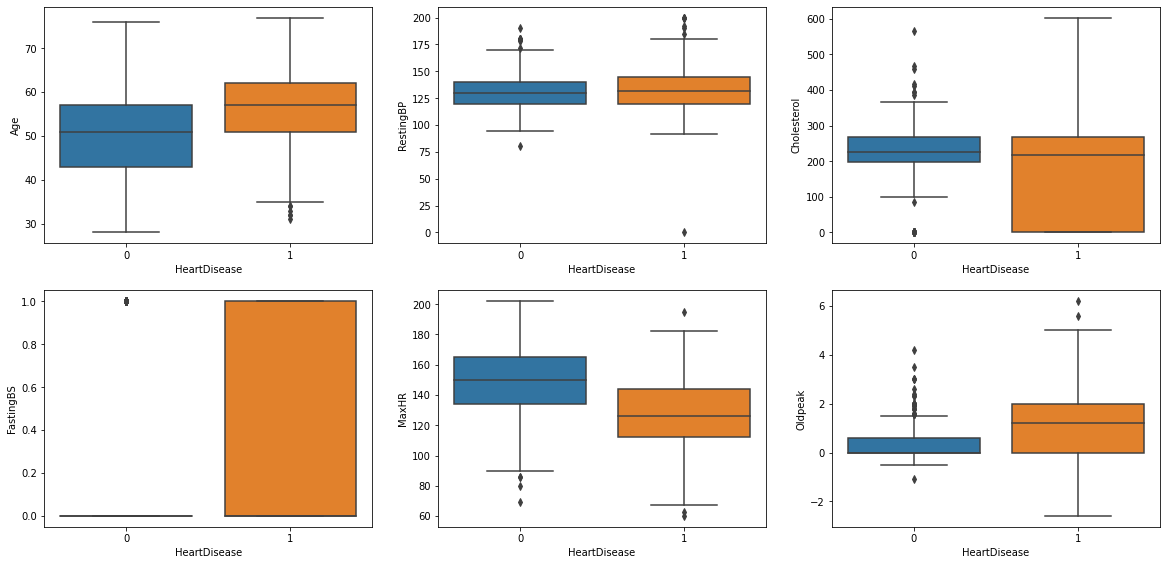

In [ ]:
index = 0
plt.figure(figsize = (20,20))
for feature in numerical:
  if feature != 'HeartDisease':
    index += 1
    plt.subplot(4, 3, index)
    sns.boxplot(x = 'HeartDisease', y = feature, data = df)

In [ ]:
fig = px.scatter_3d(df, 
                    x = 'RestingBP',
                    y = 'Age',
                    z = 'Sex', 
                    color = 'HeartDisease')
fig.show();

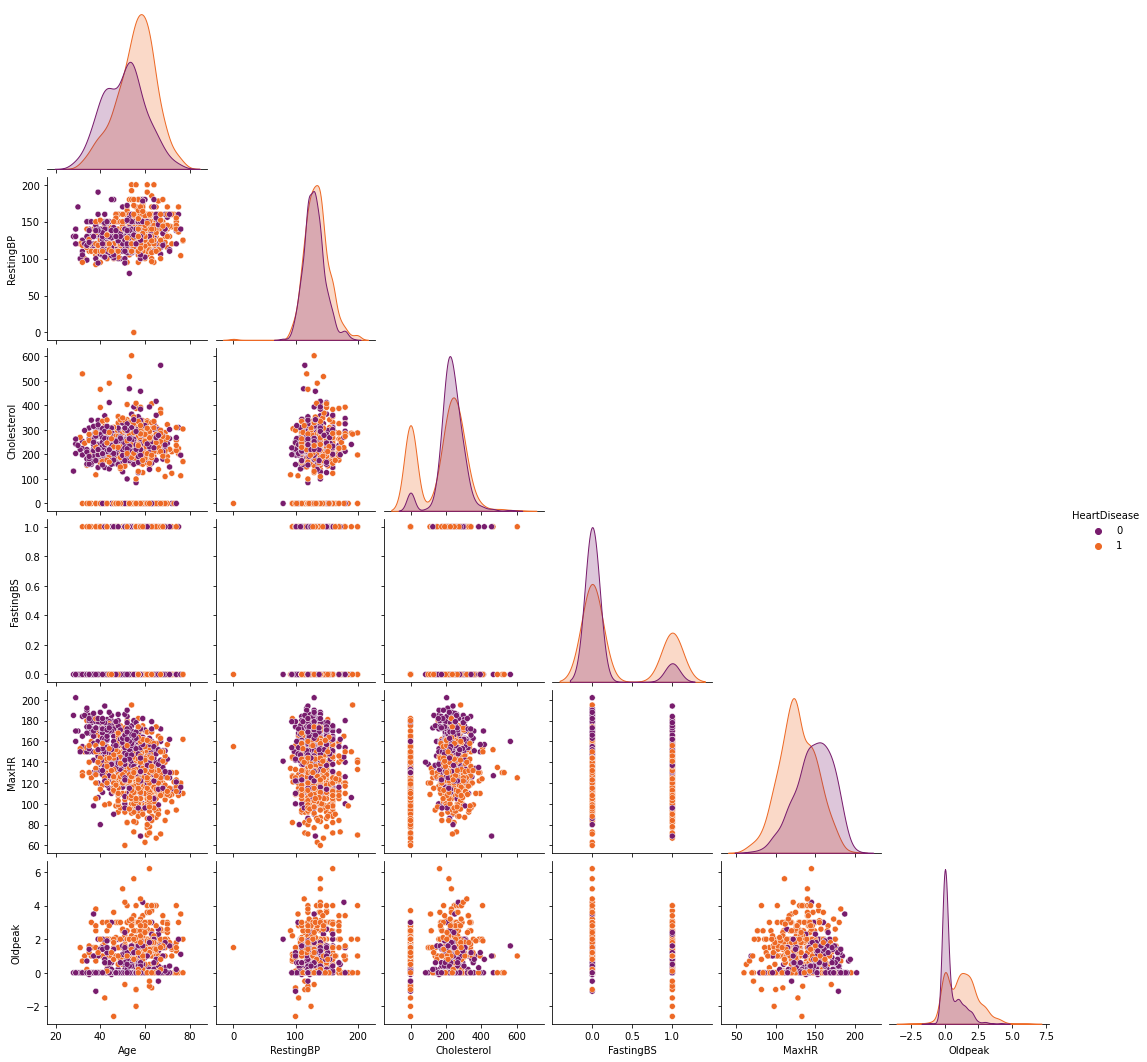

In [ ]:
sns.pairplot(df, hue = 'HeartDisease', palette = 'inferno', corner = True);

### 3.5.3 Further Statistical Exploration of Numerical Features
We calculate the skewness and kurtosis of numerical features.

In [ ]:
skew_vals = df.skew().sort_values(ascending = False)
skew_vals

FastingBS       1.264
Oldpeak         1.023
RestingBP       0.180
MaxHR          -0.144
Age            -0.196
HeartDisease   -0.215
Cholesterol    -0.610
dtype: float64

In [ ]:
#### Checking for the threshold limit of features to evaluate the skewness. 
#### For a linear model, an overall value below the absolute value of 1, is acceptable

skew_limit = 0.5
skew_vals = df.skew()
skew_cols = skew_vals[abs(skew_vals) > skew_limit].sort_values(ascending = False)
skew_cols

FastingBS      1.264
Oldpeak        1.023
Cholesterol   -0.610
dtype: float64

In [ ]:
### This code interpretes the skewness values obtained.
for skew in skew_vals:
  if -0.5 < skew < 0.5:
    print("A skewness value of ", '\033[1m', Fore.GREEN, skew, '\033[0m', "means that the distribution is approximately", '\033[1m', Fore.GREEN, "Symmetric", '\033[0m')
  elif -0.5 < skew < -1.0 or 0.5 < skew < 1.0:
    print("A skewness value of ", '\033[1m', Fore.YELLOW, skew, '\033[0m', "means that the distribution is approximately", '\033[1m', Fore.YELLOW, "moderatly skewed", '\033[0m')
  else:
    print("A skewness value of ", '\033[1m', Fore.RED, skew, '\033[0m', "means that the distribution is approximately", '\033[1m', Fore.RED, "HIGHLY SKEWED", '\033[0m')

A skewness value of    -0.19593302867569365  means that the distribution is approximately   Symmetric 
A skewness value of    0.1798393100516288  means that the distribution is approximately   Symmetric 
A skewness value of    -0.6100864307268192  means that the distribution is approximately   HIGHLY SKEWED 
A skewness value of    1.2644841750727027  means that the distribution is approximately   HIGHLY SKEWED 
A skewness value of    -0.14435941846180994  means that the distribution is approximately   Symmetric 
A skewness value of    1.0228720218107528  means that the distribution is approximately   HIGHLY SKEWED 
A skewness value of    -0.21508633825088655  means that the distribution is approximately   Symmetric 
